## XGBoost for classication of diabetes onset prediction data
Adapted from https://www.kaggle.com/code/soheiltehranipour/xgboost-tutorial-classification

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# load data
df = pd.read_csv('datasets_228_482_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# What is the baseline?  Let's look at a histogram of y (outcome)


<Axes: >

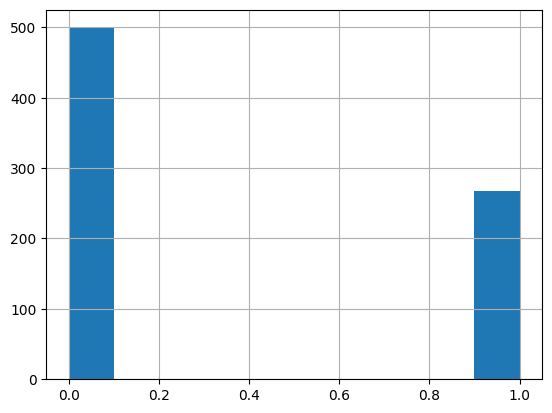

In [17]:
# What is the baseline?  Let's look at a histogram of y (outcome)
df["Outcome"].hist()

### We can see that roughly 1/3 of the samples are "False", which means that any classifer with accuracy below 66% is useless.

## Split data into X and y
- in the notebook, we use ".values" which will convert the data
- to numpy matrices

In [18]:
# split data into X and y
# in the notebook, we use ".values" which will convert the data
# to numpy matrices
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
type(X)

numpy.ndarray

In [19]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


## Fit model training data

In [21]:

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred) * 100
print("Train accuracy of the XGBClassifer Model: ", accuracy)

Train accuracy of the XGBClassifer Model:  100.0


In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Test accuracy of the XGBClassifer Model: ",accuracy)

Test accuracy of the XGBClassifer Model:  75.32467532467533


What can you learn from the last application of XGBClassifer? Is there overfitting?  Try to tune the parameters of xgboost to get an improved result on the test set.  You can learn about the parameters from XGBoost official documentation here https://xgboost.readthedocs.io/en/stable/python/python_intro.html

Or from the kaggle notebook this notebook is based on:
https://www.kaggle.com/code/soheiltehranipour/xgboost-tutorial-classification
Note that you don't have that much data, so you can't try too many things because you will get improvements "by chance".   What is the best you can get using logistic regression?

## What can you learn from the last application of XGBClassifer?
## Is there overfitting? Try to tune the parameters of xgboost to get an improved result on the test set.

### From the results, we see that the train accuracy is significantly higher than the test accuracy.




*   This indicates that the model might be overfitting to the training data. It's learning the training data too well, and it's not generalizing well to unseen data (test set).
*   Try to tune the parameters of xgboost to get an improved result on the test set.
* Let's try tuning some parameters to reduce overfitting and improve test accuracy.
* We'll focus on regularization parameters, learning rate, and tree depth.




In [23]:
model = XGBClassifier(
    learning_rate=0.1,  # Reduce learning rate to prevent overfitting
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,  # Limit tree depth to prevent overfitting
    reg_lambda=1,  # L2 regularization term on weights
    reg_alpha=0,  # L1 regularization term on weights
    subsample=0.8, # Use a fraction of training data for each tree
    colsample_bytree=0.8 # Use a fraction of features for each tree
)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred) * 100
print("Train accuracy of the XGBClassifer Model: ", accuracy)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Test accuracy of the XGBClassifer Model: ", accuracy)

Train accuracy of the XGBClassifer Model:  90.71661237785015
Test accuracy of the XGBClassifer Model:  78.57142857142857


## Further experiment with other parameters and use techniques like cross-validation to find the optimal hyperparameter settings the model.


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
model = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Test accuracy with best parameters: ", accuracy)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Test accuracy with best parameters:  78.57142857142857


## Logistic Regression and compare with XGBoost


 - achieve improved results on the test set and create a more robust model for diabetes onset prediction.



In [25]:
from sklearn.linear_model import LogisticRegression

# Create and train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100
print("Test accuracy of the Logistic Regression Model:", accuracy_logistic)

Test accuracy of the Logistic Regression Model: 81.16883116883116
